<a href="https://colab.research.google.com/github/ZichenLiu123/DataScience_Learning/blob/main/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## for distances
from scipy.spatial.distance import cosine

In [ ]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [ ]:
# Set up wikidata API
!pip -q install qwikidata
!pip -q install sparqlwrapper

from qwikidata.entity import WikidataItem, WikidataLexeme, WikidataProperty
from qwikidata.linked_data_interface import get_entity_dict_from_api
import sys
import seaborn as sns
import folium # mapping
from folium.plugins import HeatMap
import missingno as msno
from SPARQLWrapper import SPARQLWrapper, JSON
import matplotlib.pyplot as plt
from typing import List, Dict

import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.1 MB/s eta 0:00:00
Setup Complete


In [ ]:
# modified from https://itnext.io/extracting-data-from-wikidata-using-sparql-and-python-59e0037996f
import json
import ast

class WikiDataQueryResults:
    """
    A class that can be used to query data from Wikidata using SPARQL and return the results as a Pandas DataFrame or a list
    of values for a specific key.
    """
    def __init__(self, query: str):
        """
        Initializes the WikiDataQueryResults object with a SPARQL query string.
        :param query: A SPARQL query string.
        """
        self.user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
        self.endpoint_url = "https://query.wikidata.org/sparql"
        self.sparql = SPARQLWrapper(self.endpoint_url, agent=self.user_agent)
        self.sparql.setQuery(query)
        self.sparql.setReturnFormat(JSON)

    def __transform2dicts(self, results: List[Dict]) -> List[Dict]:
        """
        Helper function to transform SPARQL query results into a list of dictionaries.
        :param results: A list of query results returned by SPARQLWrapper.
        :return: A list of dictionaries, where each dictionary represents a result row and has keys corresponding to the
        variables in the SPARQL SELECT clause.
        """
        new_results = []
        for result in results:
            print(result)
            break
            new_result = {}
            for key in result:
                new_result[key] = result[key]['value']
            new_results.append(new_result)
        return new_results

    # Function to remove invalid control characters
    def __remove_invalid_chars(text):
        return ''.join(char for char in text if ord(char) > 31 or char == '\n' or char == '\t')

    def _load(self) -> List[Dict]:
        """
        Helper function that loads the data from Wikidata using the SPARQLWrapper library, and transforms the results into
        a list of dictionaries.
        :return: A list of dictionaries, where each dictionary represents a result row and has keys corresponding to the
        variables in the SPARQL SELECT clause.
        """
        results = self.sparql.queryAndConvert()['results']['bindings']
        # Preprocess the JSON response to remove control characters
        results = json.dumps(results).encode('utf-8').decode('unicode_escape')

        return results

    def load_as_dataframe(self) -> pd.DataFrame:
        """
        Executes the SPARQL query and returns the results as a Pandas DataFrame.
        :return: A Pandas DataFrame representing the query results.
        """
        results = self._load()
        df = pd.read_json(results)
        df = df.applymap(lambda x: x['value'])
        return df

# Q1



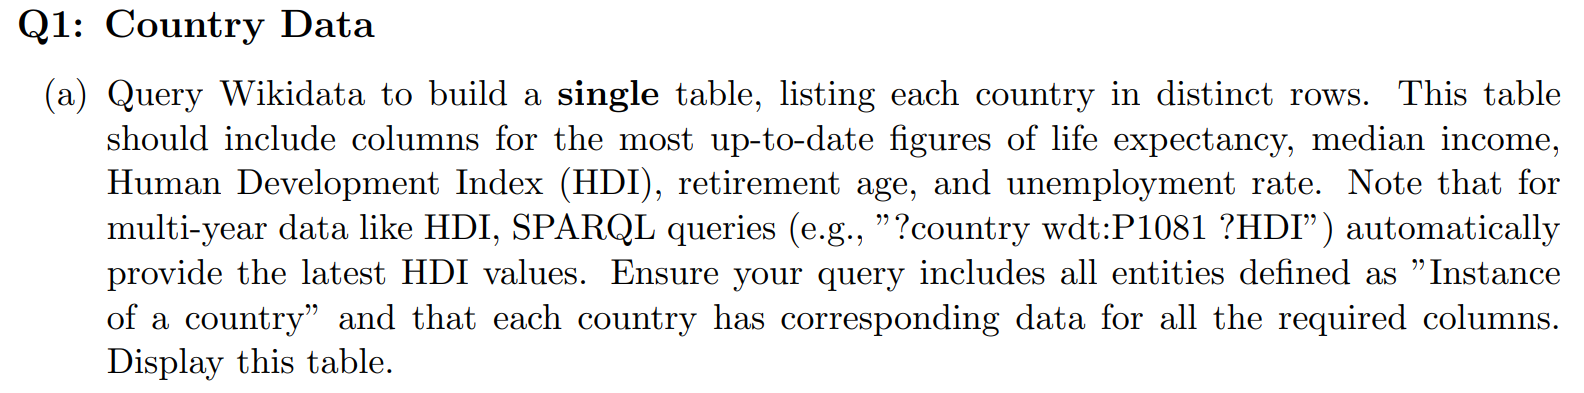

## (a)

In [ ]:
# Some relations such as wdt:P1081 links to multiple values,
# Fortunately, calling ?country wdt:P1081 ?HDI will automatically return the latest HDI,

countryQuery = """
SELECT
  ?countryLabel
  ?lifeExpectancy
  ?medianIncome
  ?HDI
  ?retirementAge
  ?unemploymentRate
WHERE {
  ?country wdt:P31 wd:Q6256;
          wdt:P2250 ?lifeExpectancy;
          wdt:P3529 ?medianIncome;
          wdt:P1081 ?HDI;
          wdt:P3001 ?retirementAge;
          wdt:P1198 ?unemploymentRate.

  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
"""

## Output format is given below
Country_df = WikiDataQueryResults(countryQuery).load_as_dataframe()
Country_df

,medianIncome,retirementAge,unemploymentRate,lifeExpectancy,HDI,countryLabel
0,70336,65,7,83.62,0.936,Canada
1,34822,60,4,83.98488,0.925,Japan
2,557655,60,4,83.98488,0.925,Japan
3,51489,67,3,82.50976,0.966,Norway
4,21959,65,16,78.71707,0.905,Spain
5,21959,65,16,78.96585,0.905,Spain
6,21959,65,16,79.36829,0.905,Spain
7,21959,65,16,79.56829,0.905,Spain
8,21959,65,16,79.61951,0.905,Spain
9,21959,65,16,79.87073,0.905,Spain


## (b)

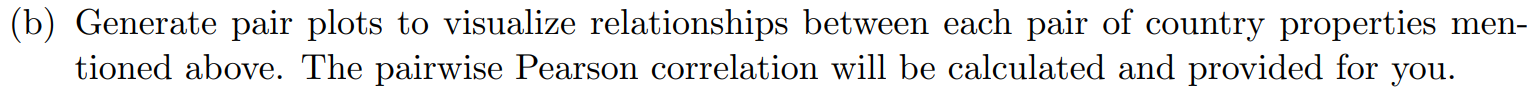

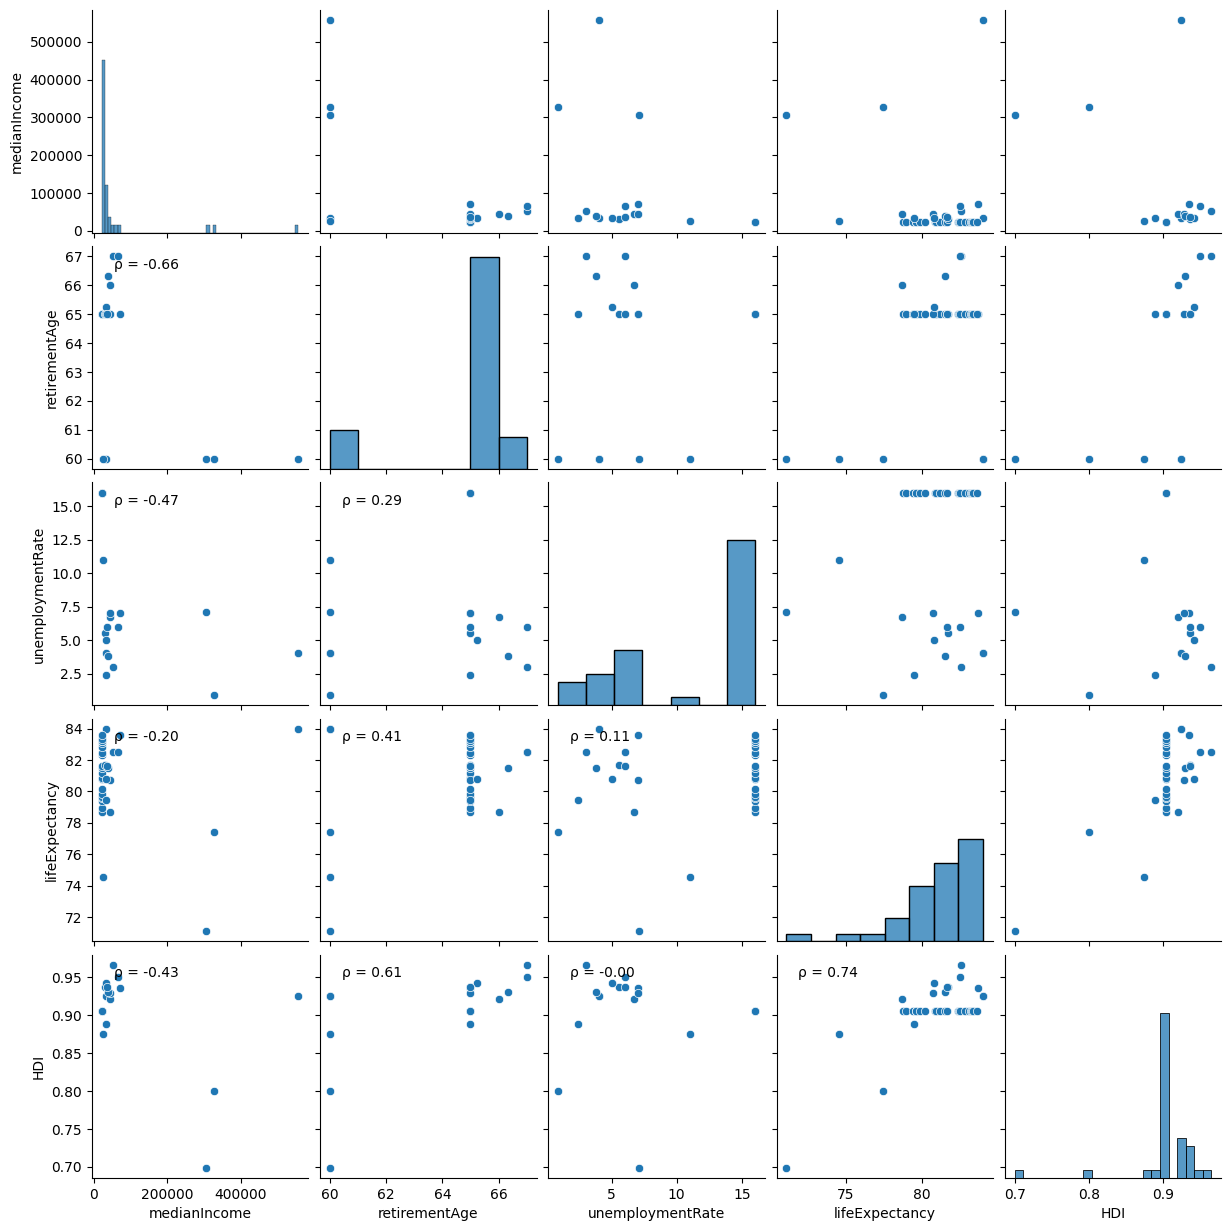

In [ ]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

# get everything to numerical
Country_df=Country_df.drop(columns=['countryLabel'])
Country_df = Country_df.apply(pd.to_numeric)

# pairplot
## YOUR CODE STARTS HERE
g=sns.pairplot(Country_df)
## YOUR CODE ENDS HERE
g.map_lower(corrfunc)
plt.show()

## (c)

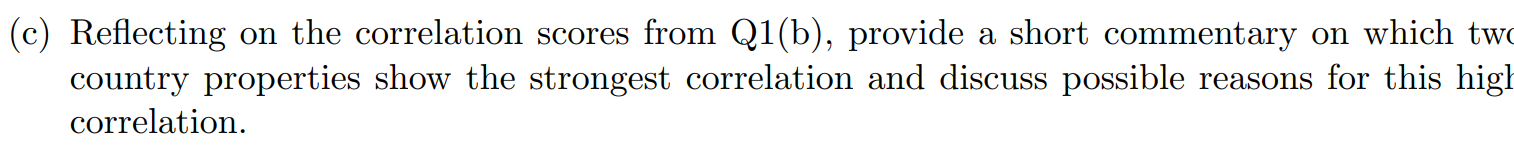

**Enter answer here:** The strong Pearson correlation observed between the Human Development Index (HDI) and life expectancy likely stems from the fact that life expectancy is a direct component of HDI, along with education and income levels. Higher HDI values, reflecting better access to quality healthcare, higher educational attainment, and improved economic standards, often correspond to longer life expectancies.


# Q2

## (a)

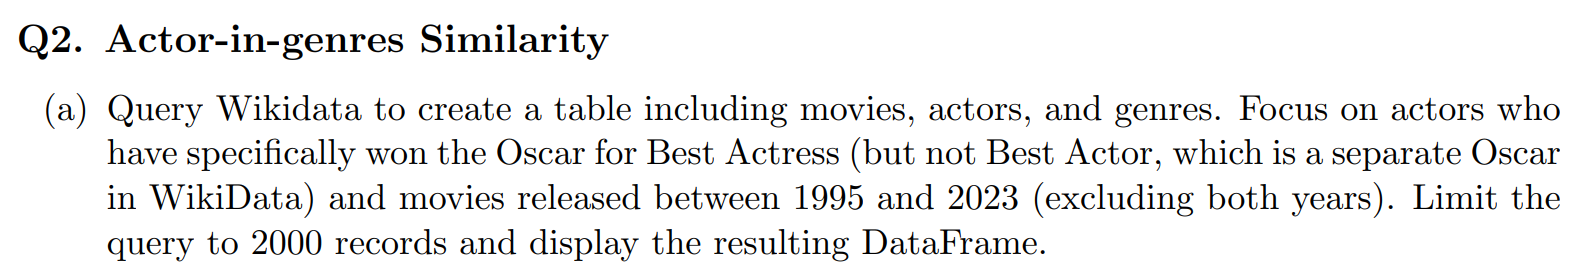

In [ ]:
actor_genre_Query = """
SELECT DISTINCT ?movieLabel ?actorLabel ?genreLabel
WHERE {
  ?movie wdt:P31 wd:Q11424;        # Instance of a film
         wdt:P136 ?genre;          # Genre of the film
         wdt:P161 ?actor;          # Actor in the film
         wdt:P577 ?releaseDate.    # Film's release date

  FILTER(YEAR(?releaseDate) > 1995 && YEAR(?releaseDate) < 2023) # Release dates between 1996 and 2022

  # Ensure the actor has won the Oscar for Best Actress
  ?actor p:P166 ?awardStatement.

  # Academy Award for Best Actress
  ?awardStatement ps:P166 wd:Q103618.

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
LIMIT 2000
"""

# Assuming WikiDataQueryResults is a predefined function or class in your environment
# that can execute SPARQL queries and return pandas DataFrames
actor_genre_df = WikiDataQueryResults(actor_genre_Query).load_as_dataframe()
actor_genre_df


,movieLabel,actorLabel,genreLabel
0,The Hours,Nicole Kidman,film based on a novel
1,Eyes Wide Shut,Nicole Kidman,mystery film
2,Eyes Wide Shut,Nicole Kidman,thriller film
3,Trespass,Nicole Kidman,crime film
4,Trespass,Nicole Kidman,drama film
...,...,...,...
1995,One True Thing,Renée Zellweger,drama film
1996,American Psycho,Reese Witherspoon,comedy horror
1997,Fear,Reese Witherspoon,neo-noir
1998,The Importance of Being Earnest,Reese Witherspoon,romantic comedy


## (b)

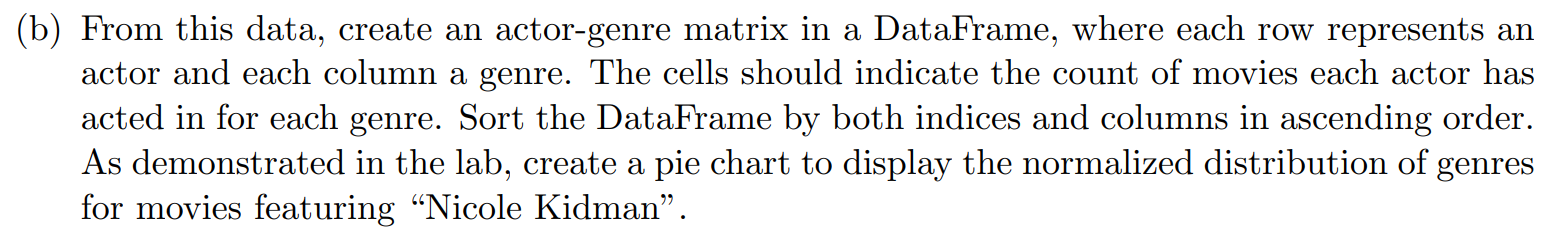

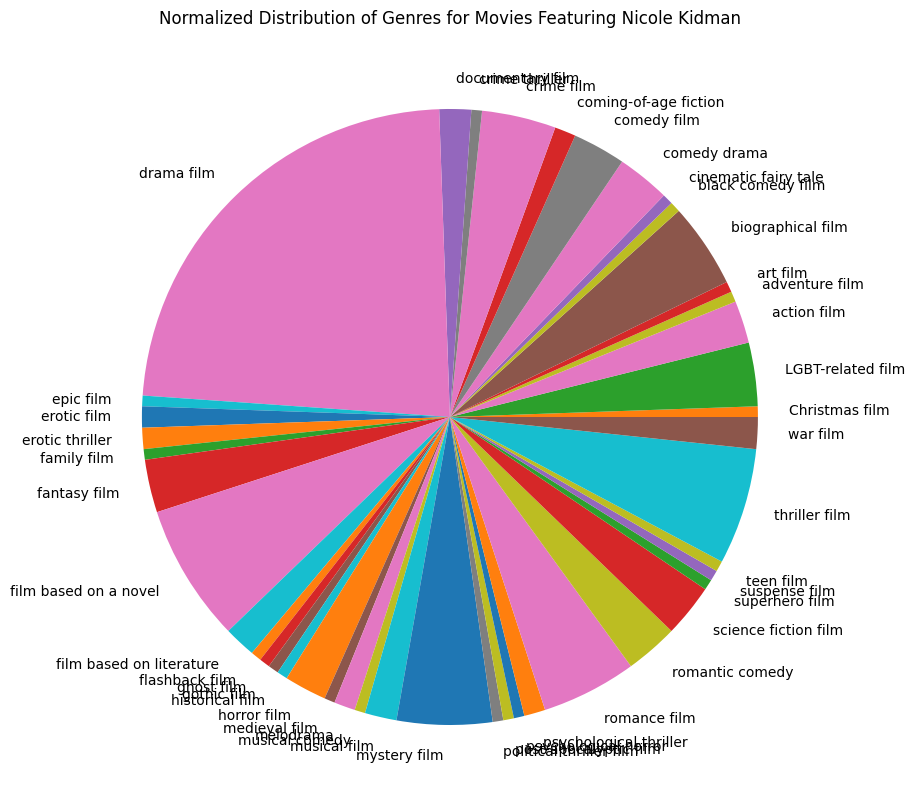

In [ ]:
## YOUR CODE STARTS HERE

actor_genre_matrix = pd.crosstab(actor_genre_df['actorLabel'], actor_genre_df['genreLabel'])

actor_genre_matrix.sort_index(axis=0, inplace=True)
actor_genre_matrix.sort_index(axis=1, inplace=True)

nicole_genre_counts = actor_genre_matrix.loc['Nicole Kidman']

nicole_normalized_genre_vector = nicole_genre_counts / nicole_genre_counts.sum()

nicole_normalized_genre_vector.plot(kind='pie', figsize=(10, 10))
plt.title('Normalized Distribution of Genres for Movies Featuring Nicole Kidman')
plt.ylabel('')  # Hide the y-label
plt.show()



## (c)

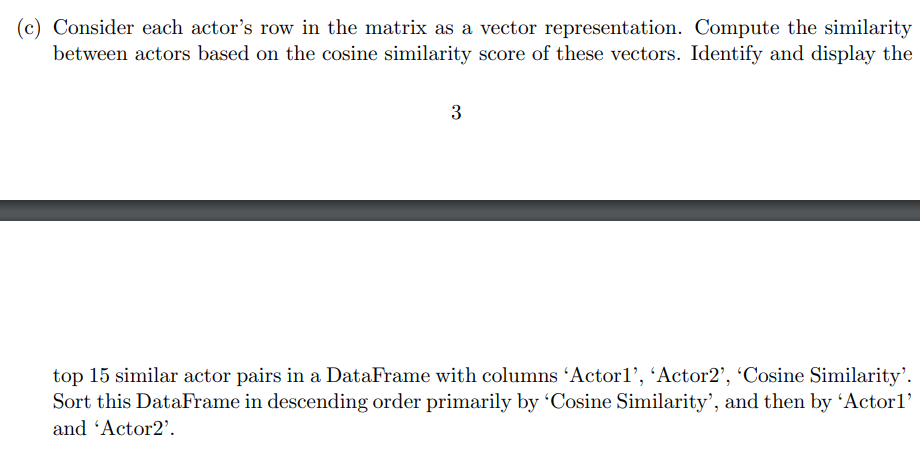

In [ ]:
# Output should be a dataframe with columns "Actor1", "Actor2", "Cosine Similarity",
# Print Top 15, sorted by "Cosine Similarity", then "Actor1", then "Actor2" all in Descending Order

# Initialize an empty list to store the results
similarity_results = []
# hint, similarity_results = [ (actors1, actors2, cosine_similarity_score), ... ]

## YOUR CODE STARTS HERE
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

cosine_sim = cosine_similarity(actor_genre_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=actor_genre_matrix.index, columns=actor_genre_matrix.index)

for actor1, actor2 in combinations(cosine_sim_df.index, 2):
    similarity_score = cosine_sim_df.loc[actor1, actor2]
    similarity_results.append((actor1, actor2, similarity_score))

## YOUR CODE ENDS HERE
## Output format is given below

# Create a DataFrame for the results
similarity_df = pd.DataFrame(similarity_results, columns=['Actor1', 'Actor2', 'Cosine Similarity'])

# Sort the DataFrame
sorted_similarity_df = similarity_df.sort_values(by=['Cosine Similarity', 'Actor1', 'Actor2'], ascending=False)

# Display the sorted DataFrame
sorted_similarity_df.head(15)

,Actor1,Actor2,Cosine Similarity
780,Olivia de Havilland,Simone Signoret,1.000000
738,Mary Pickford,Simone Signoret,1.000000
732,Mary Pickford,Olivia de Havilland,1.000000
288,Elizabeth Taylor,Simone Signoret,1.000000
282,Elizabeth Taylor,Olivia de Havilland,1.000000
278,Elizabeth Taylor,Mary Pickford,1.000000
441,Holly Hunter,Susan Sarandon,0.953516
58,Audrey Hepburn,Katharine Hepburn,0.942809
214,Charlize Theron,Nicole Kidman,0.942212
728,Marion Cotillard,Susan Sarandon,0.936910
